# Modelo de FitzHugh-Nagumo para Osciladores Bioquímicos

Este modelo es particularmente útil para entender el comportamiento oscilatorio en sistemas bioquímicos, como la activación y desactivación periódica de ciertas proteínas o genes. El modelo consiste en un sistema de dos ecuaciones diferenciales acopladas no lineales.

Las ecuaciones del modelo de FitzHugh-Nagumo son:

$\begin{cases}
\frac{dv}{dt}=v-\frac{v^3}{3}-w+I \\
\frac{dw}{dt}=\frac{1}{\tau}(v+a-bw)
\end{cases}$

donde:


1. $v$ es la variable que representa el potencial de membrana.
2. $w$ es la variable de recuperación.
3. $I$ es una corriente externa aplicada.
4. $a$, $b$ y $\tau$ son parametros que controlan el comportamiento del sistema.

$\textbf{¿Para qué se utiliza?}$

El modelo de FitzHugh-Nagumo se utiliza para estudiar y entender los mecanismos subyacentes de la excitabilidad neuronal y los fenómenos de oscilación en sistemas biológicos y bioquímicos. Es especialmente útil en la neurociencia teórica y en el estudio de osciladores biológicos, tales como:

1. Potenciales de acción en neuronas.
2. Oscilaciones en sistemas bioquímicos, como ciclos de activación e inactivación en redes de genes.
3. Dinámica de poblaciones neuronales.
4. Estudio de patrones espaciales en tejidos excitables.

$\textbf{¿Quién desarrolló el modelo?}$

El modelo fue desarrollado independientemente por dos científicos:

1. _Richard FitzHugh_: Biólogo y matemático que propuso una simplificación del modelo de Hodgkin-Huxley en la década de 1960.
2. _Jinichi Nagumo_: Ingeniero que, junto con colaboradores, adaptó el modelo a una forma electrónica para estudiar circuitos de neuronas artificiales.

FitzHugh y Nagumo, buscando una simplificación del modelo de Hodgkin-Huxley, desarrollaron independientemente sus modelos. FitzHugh presentó su modelo en 1961, y Nagumo, junto con Arimoto y Yoshizawa, lo adaptó a un circuito electrónico en 1962.

__Aplicaciones y desarrollo posterior__

El modelo de FitzHugh-Nagumo ha sido una herramienta fundamental en la neurociencia teórica, proporcionando una comprensión más accesible de la dinámica neuronal básica. Además, ha inspirado numerosos estudios sobre la propagación de ondas en medios excitables, la formación de patrones y el comportamiento caótico en sistemas biológicos y físicos.

1. _Neurociencia_: Entendimiento de fenómenos de excitabilidad neuronal y propagación de señales en redes neuronales.
2. _Biología celular_: Estudio de osciladores bioquímicos, como ciclos de activación en proteínas y genes.
3. _Física y matemáticas_: Análisis de sistemas dinámicos, teoría de bifurcaciones y comportamiento no lineal en medios excitables.

__Ejemplos de aplicaciones específicas:__

1. _Patrones de actividad en el corazón_: Comprensión de arritmias y otros trastornos del ritmo cardíaco.
2. _Redes de genes oscilatorios_: Estudio de la dinámica de activación e inactivación en redes de regulación genética.
3. _Propagación de señales en redes neuronales_: Análisis de cómo las neuronas individuales contribuyen a la actividad colectiva en el cerebro.

__Puntos Críticos__

$\begin{cases}
\frac{dv}{dt}=v-\frac{v^3}{3}-w+I \\
\frac{dw}{dt}=\frac{1}{\tau}(v+a-bw)
\end{cases}$


Para encontrar los puntos críticos del sistema de FitzHugh-Nagumo, debemos resolver las ecuaciones en las que las derivadas son iguales a cero:

$\begin{cases}
v-\frac{v^3}{3}-w+I=0 \\
\frac{1}{\tau}(v+a-bw)=0
\end{cases}$


Primero, resolvemos la segunda ecuación para $w$:

$w=\frac{v+a}{b}$

Al sustituir en la primera eccuaación tenemos:

$(b-1)v-\frac{bv^3}{3}-a+bI=0$

Para simplificar, los puntos críticos son las soluciones de esta ecuación cúbica:

$\frac{bv^3}{3}+(b-1)v+a-bI=0$

__Retrato Fase__

El retrato de fase de un sistema dinámico muestra las trayectorias de las variables del sistema en el espacio de fases. En el caso del modelo de FitzHugh-Nagumo, se representan las trayectorias de $v$ y $w$.


Podemos dibujar las curvas nulas (nullclines), que son las líneas donde las derivadas de $v$ y $w$ se anulan:

1. Nullcline de $v$: $v-\frac{v^3}{3}-w+I=0$
2. Nullcline de $w$: $w=\frac{v+a}{b}$

Estas nullclines dividen el espacio de fases en regiones donde las direcciones de las trayectorias cambian, y los puntos de intersección son los puntos críticos.

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

In [ ]:
# Definir símbolos y parámetros
v, w = sp.symbols('v, w')
a, b, tau, I = 0.7, 0.8, 12.5, 0.5

In [ ]:
# Definir las ecuaciones del modelo de FitzHugh-Nagumo
dv_dt = v - (v**3) / 3 - w + I
dw_dt = (v + a - b * w) / tau

In [ ]:
# Encontrar los puntos críticos
critical_points = sp.solve([dv_dt, dw_dt], (v, w))

In [ ]:
# Matriz Jacobiana
jacobi_matrix = sp.Matrix([[dv_dt.diff(var) for var in (v, w)],
                           [dw_dt.diff(var) for var in (v, w)]])

In [ ]:
# Función discriminante
def discriminant(J):
    return J.trace()**2 - 4 * J.det()


In [ ]:
# Función para determinar el tipo de punto fijo
def tipo(matrix):
    t = matrix.trace()
    d = matrix.det()
    disc = discriminant(matrix)
    
    if t > 0 and d > 0 and disc > 0:
        return "Región I (Nodo inestable)"
    elif t > 0 and d > 0 and disc < 0:
        return "Región II (Foco inestable)"
    elif t < 0 and d > 0 and disc < 0:
        return "Región III (Foco estable)"
    elif t < 0 and d > 0 and disc > 0:
        return "Región IV (Nodo estable)"
    elif d < 0 and disc < 0:
        return "Región V (Silla de montar)"
    else:
        return "Degenerado"

In [ ]:
# Clasificar la estabilidad del punto fijo
def clas(matrix):
    t = matrix.trace()
    d = matrix.det()
    
    if t < 0 and d > 0:
        return "El punto fijo es estable y atractivo"
    elif t <= 0 and d > 0:
        return "El punto fijo es estable"
    elif t > 0 and d < 0:
        return "El punto fijo es inestable"
    else:
        return "No tiene clasificación"

In [ ]:
# Evaluación en puntos críticos y clasificación
print("Puntos críticos y su clasificación:")
for point in critical_points:
    J = jacobi_matrix.subs({v: point[0], w: point[1]})
    tr = J.trace()
    det = J.det()
    disc = discriminant(J)
    
    print(f"\nPunto crítico: {point}")
    print(f"Traza: {tr}")
    print(f"Determinante: {det}")
    print(f"Discriminante: {disc}")
    print(f"Tipo: {tipo(J)}")
    print(f"Clasificación: {clas(J)}")

In [ ]:
# Retrato fase del modelo de FitzHugh-Nagumo
def fitzhugh_nagumo(X, t, a, b, tau, I):
    v, w = X
    dvdt = v - (v**3) / 3 - w + I
    dwdt = (v + a - b * w) / tau
    return [dvdt, dwdt]

v_range = np.linspace(-3, 3, 20)
w_range = np.linspace(-3, 3, 20)
V, W = np.meshgrid(v_range, w_range)
dV_dt = np.array([[dv_dt.subs({v: v_val, w: w_val, I: I}) for v_val in v_range] for w_val in w_range], dtype=float)
dW_dt = np.array([[dw_dt.subs({v: v_val, w: w_val}) for v_val in v_range] for w_val in w_range], dtype=float)

fig, ax = plt.subplots()
ax.streamplot(V, W, dV_dt, dW_dt, density=1)
for point in critical_points:
    ax.plot(point[0], point[1], 'ro')
plt.xlabel('$v$')
plt.ylabel('$w$')
plt.title('Retrato Fase del Modelo de FitzHugh-Nagumo')
plt.grid()
plt.show()


In [ ]:
# Graficar trayectorias del sistema de FitzHugh-Nagumo
def grafica(fitzhugh_nagumo, a, b, tau, I):
    ts = np.linspace(0, 50, 1000)
    ic = np.linspace(-2, 2, 5)
    for r in ic:
        for s in ic:
            x0 = [r, s]
            xs = odeint(fitzhugh_nagumo, x0, ts, args=(a, b, tau, I))
            plt.plot(xs[:, 0], xs[:, 1], "r-")

    plt.xlabel('$v$', fontsize=15)
    plt.ylabel('$w$', fontsize=15)
    plt.tick_params(labelsize=10)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

    V, W = np.mgrid[-3:3:20j, -3:3:20j]
    u = V - (V**3) / 3 - W + I
    v = (V + a - b * W) / tau
    plt.quiver(V, W, u, v)
    plt.show()

# Ejecutar la gráfica de trayectorias
grafica(fitzhugh_nagumo, a, b, tau, I)


Puntos críticos y su clasificación:

Punto crítico: (-0.804847747008334, -0.131059683760418)
Traza: 0.288220104135608
Determinante: 0.0574579133353211
Discriminante: -0.146760824913344
Tipo: Región II (Foco inestable)
Clasificación: No tiene clasificación

Punto crítico: (0.402423873504167 - 1.11168112419807*I, 1.37802984188021 - 1.38960140524759*I)
Traza: 2.0098899479322 + 0.894734048202512*I
Determinante: -0.0527289566676606 - 0.0572629790849608*I
Discriminante: 3.45002441245667 + 3.82568585544966*I
Tipo: Valores complejos - no clasificado
Clasificación: Valores complejos - no clasificado

Punto crítico: (0.402423873504167 + 1.11168112419807*I, 1.37802984188021 + 1.38960140524759*I)
Traza: 2.0098899479322 - 0.894734048202512*I
Determinante: -0.0527289566676606 + 0.0572629790849608*I
Discriminante: 3.45002441245667 - 3.82568585544966*I
Tipo: Valores complejos - no clasificado
Clasificación: Valores complejos - no clasificado


TypeError: Cannot convert complex to float

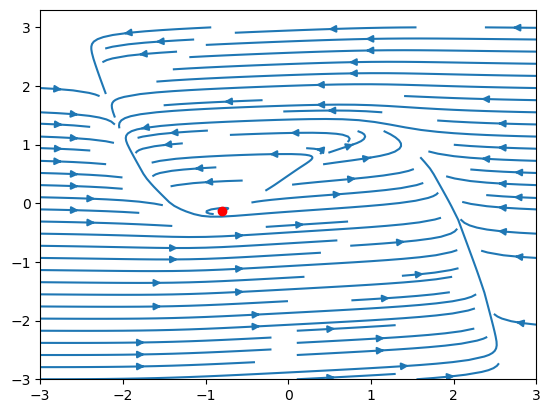

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir símbolos y parámetros
v, w = sp.symbols('v w')
a, b, tau, I = 0.7, 0.8, 12.5, 0.5

# Definir las ecuaciones del modelo de FitzHugh-Nagumo
dv_dt = v - (v**3) / 3 - w + I
dw_dt = (v + a - b * w) / tau

# Encontrar los puntos críticos
critical_points = sp.solve([dv_dt, dw_dt], (v, w))

# Matriz Jacobiana
jacobi_matrix = sp.Matrix([[dv_dt.diff(var) for var in (v, w)],
                           [dw_dt.diff(var) for var in (v, w)]])

# Función discriminante
def discriminant(J):
    return J.trace()**2 - 4 * J.det()

# Función para determinar el tipo de punto fijo
def tipo(matrix):
    t = matrix.trace().evalf()
    d = matrix.det().evalf()
    disc = discriminant(matrix).evalf()
    
    if t.is_real and d.is_real and disc.is_real:
        t = float(t)
        d = float(d)
        disc = float(disc)
        
        if t > 0 and d > 0 and disc > 0:
            return "Región I (Nodo inestable)"
        elif t > 0 and d > 0 and disc < 0:
            return "Región II (Foco inestable)"
        elif t < 0 and d > 0 and disc < 0:
            return "Región III (Foco estable)"
        elif t < 0 and d > 0 and disc > 0:
            return "Región IV (Nodo estable)"
        elif d < 0 and disc < 0:
            return "Región V (Silla de montar)"
        else:
            return "Degenerado"
    else:
        return "Valores complejos - no clasificado"

# Clasificar la estabilidad del punto fijo
def clas(matrix):
    t = matrix.trace().evalf()
    d = matrix.det().evalf()
    
    if t.is_real and d.is_real:
        t = float(t)
        d = float(d)
        
        if t < 0 and d > 0:
            return "El punto fijo es estable y atractivo"
        elif t <= 0 and d > 0:
            return "El punto fijo es estable"
        elif t > 0 and d < 0:
            return "El punto fijo es inestable"
        else:
            return "No tiene clasificación"
    else:
        return "Valores complejos - no clasificado"

# Evaluación en puntos críticos y clasificación
print("Puntos críticos y su clasificación:")
for point in critical_points:
    J = jacobi_matrix.subs({v: point[0], w: point[1]})
    tr = J.trace().evalf()
    det = J.det().evalf()
    disc = discriminant(J).evalf()
    
    print(f"\nPunto crítico: {point}")
    print(f"Traza: {tr}")
    print(f"Determinante: {det}")
    print(f"Discriminante: {disc}")
    print(f"Tipo: {tipo(J)}")
    print(f"Clasificación: {clas(J)}")

# Retrato fase del modelo de FitzHugh-Nagumo
def fitzhugh_nagumo(X, t, a, b, tau, I):
    v, w = X
    dvdt = v - (v**3) / 3 - w + I
    dwdt = (v + a - b * w) / tau
    return [dvdt, dwdt]

v_range = np.linspace(-3, 3, 20)
w_range = np.linspace(-3, 3, 20)
V, W = np.meshgrid(v_range, w_range)
dV_dt = np.array([[float(dv_dt.subs({v: v_val, w: w_val})) for v_val in v_range] for w_val in w_range], dtype=float)
dW_dt = np.array([[float(dw_dt.subs({v: v_val, w: w_val})) for v_val in v_range] for w_val in w_range], dtype=float)

fig, ax = plt.subplots()
ax.streamplot(V, W, dV_dt, dW_dt, density=1)
for point in critical_points:
    ax.plot(float(point[0].evalf()), float(point[1].evalf()), 'ro')
plt.xlabel('$v$')
plt.ylabel('$w$')
plt.title('Retrato Fase del Modelo de FitzHugh-Nagumo')
plt.grid()
plt.show()

# Graficar trayectorias del sistema de FitzHugh-Nagumo
def grafica(fitzhugh_nagumo, a, b, tau, I):
    ts = np.linspace(0, 50, 1000)
    ic = np.linspace(-2, 2, 5)
    for r in ic:
        for s in ic:
            x0 = [r, s]
            xs = odeint(fitzhugh_nagumo, x0, ts, args=(a, b, tau, I))
            plt.plot(xs[:, 0], xs[:, 1], "r-")

    plt.xlabel('$v$', fontsize=15)
    plt.ylabel('$w$', fontsize=15)
    plt.tick_params(labelsize=10)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

    V, W = np.mgrid[-3:3:20j, -3:3:20j]
    u = V - (V**3) / 3 - W + I
    v = (V + a - b * W) / tau
    plt.quiver(V, W, u, v, color='b')
    plt.show()

# Ejecutar la gráfica de trayectorias
grafica(fitzhugh_nagumo, a, b, tau, I)


Puntos críticos y su clasificación:

Punto crítico: (-0.804847747008334, -0.131059683760418)
Traza: 0.288220104135608
Determinante: 0.0574579133353211
Discriminante: -0.146760824913344
Tipo: Región II (Foco inestable)
Clasificación: No tiene clasificación

Punto crítico: (0.402423873504167 - 1.11168112419807*I, 1.37802984188021 - 1.38960140524759*I)
Traza: 2.0098899479322 + 0.894734048202512*I
Determinante: -0.0527289566676606 - 0.0572629790849608*I
Discriminante: 3.45002441245667 + 3.82568585544966*I
Tipo: Valores complejos - no clasificado
Clasificación: Valores complejos - no clasificado

Punto crítico: (0.402423873504167 + 1.11168112419807*I, 1.37802984188021 + 1.38960140524759*I)
Traza: 2.0098899479322 - 0.894734048202512*I
Determinante: -0.0527289566676606 + 0.0572629790849608*I
Discriminante: 3.45002441245667 - 3.82568585544966*I
Tipo: Valores complejos - no clasificado
Clasificación: Valores complejos - no clasificado


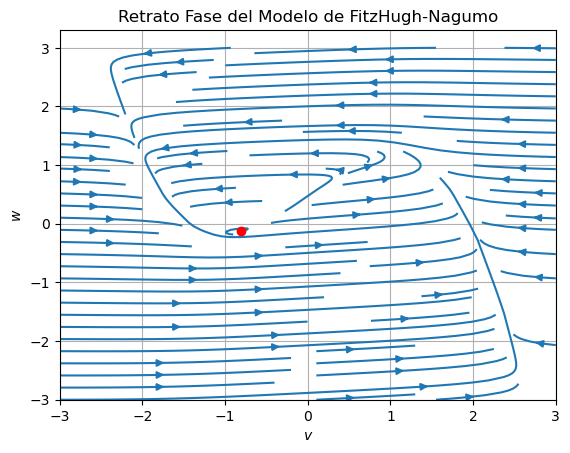

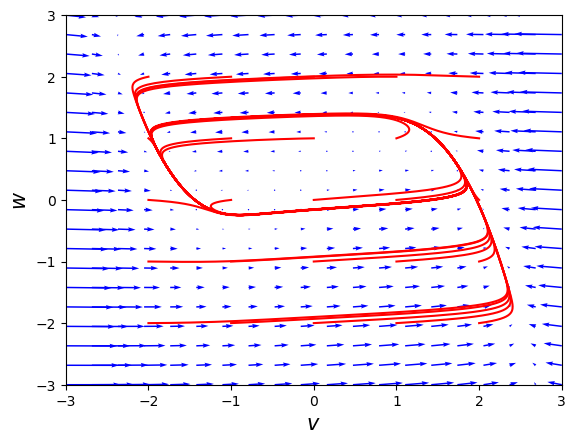

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir símbolos y parámetros
v, w = sp.symbols('v w')
a, b, tau, I = 0.7, 0.8, 12.5, 0.5

# Definir las ecuaciones del modelo de FitzHugh-Nagumo
dv_dt = v - (v**3) / 3 - w + I
dw_dt = (v + a - b * w) / tau

# Encontrar los puntos críticos
critical_points = sp.solve([dv_dt, dw_dt], (v, w))

# Matriz Jacobiana
jacobi_matrix = sp.Matrix([[dv_dt.diff(var) for var in (v, w)],
                           [dw_dt.diff(var) for var in (v, w)]])

# Función discriminante
def discriminant(J):
    return J.trace()**2 - 4 * J.det()

# Función para determinar el tipo de punto fijo
def tipo(matrix):
    t = matrix.trace().evalf()
    d = matrix.det().evalf()
    disc = discriminant(matrix).evalf()
    
    if t.is_real and d.is_real and disc.is_real:
        t = float(t)
        d = float(d)
        disc = float(disc)
        
        if t > 0 and d > 0 and disc > 0:
            return "Región I (Nodo inestable)"
        elif t > 0 and d > 0 and disc < 0:
            return "Región II (Foco inestable)"
        elif t < 0 and d > 0 and disc < 0:
            return "Región III (Foco estable)"
        elif t < 0 and d > 0 and disc > 0:
            return "Región IV (Nodo estable)"
        elif d < 0 and disc < 0:
            return "Región V (Silla de montar)"
        else:
            return "Degenerado"
    else:
        return "Valores complejos - no clasificado"

# Clasificar la estabilidad del punto fijo
def clas(matrix):
    t = matrix.trace().evalf()
    d = matrix.det().evalf()
    
    if t.is_real and d.is_real:
        t = float(t)
        d = float(d)
        
        if t < 0 and d > 0:
            return "El punto fijo es estable y atractivo"
        elif t <= 0 and d > 0:
            return "El punto fijo es estable"
        elif t > 0 and d < 0:
            return "El punto fijo es inestable"
        else:
            return "No tiene clasificación"
    else:
        return "Valores complejos - no clasificado"

# Evaluación en puntos críticos y clasificación
print("Puntos críticos y su clasificación:")
for point in critical_points:
    J = jacobi_matrix.subs({v: point[0], w: point[1]})
    tr = J.trace().evalf()
    det = J.det().evalf()
    disc = discriminant(J).evalf()
    
    print(f"\nPunto crítico: {point}")
    print(f"Traza: {tr}")
    print(f"Determinante: {det}")
    print(f"Discriminante: {disc}")
    print(f"Tipo: {tipo(J)}")
    print(f"Clasificación: {clas(J)}")

# Retrato fase del modelo de FitzHugh-Nagumo
def fitzhugh_nagumo(X, t, a, b, tau, I):
    v, w = X
    dvdt = v - (v**3) / 3 - w + I
    dwdt = (v + a - b * w) / tau
    return [dvdt, dwdt]

v_range = np.linspace(-3, 3, 20)
w_range = np.linspace(-3, 3, 20)
V, W = np.meshgrid(v_range, w_range)
dV_dt = np.array([[float(dv_dt.subs({v: v_val, w: w_val})) for v_val in v_range] for w_val in w_range], dtype=float)
dW_dt = np.array([[float(dw_dt.subs({v: v_val, w: w_val})) for v_val in v_range] for w_val in w_range], dtype=float)

fig, ax = plt.subplots()
ax.streamplot(V, W, dV_dt, dW_dt, density=1)
for point in critical_points:
    if point[0].is_real and point[1].is_real:
        ax.plot(float(point[0].evalf()), float(point[1].evalf()), 'ro')
plt.xlabel('$v$')
plt.ylabel('$w$')
plt.title('Retrato Fase del Modelo de FitzHugh-Nagumo')
plt.grid()
plt.show()

# Graficar trayectorias del sistema de FitzHugh-Nagumo
def grafica(fitzhugh_nagumo, a, b, tau, I):
    ts = np.linspace(0, 50, 1000)
    ic = np.linspace(-2, 2, 5)
    for r in ic:
        for s in ic:
            x0 = [r, s]
            xs = odeint(fitzhugh_nagumo, x0, ts, args=(a, b, tau, I))
            plt.plot(xs[:, 0], xs[:, 1], "r-")

    plt.xlabel('$v$', fontsize=15)
    plt.ylabel('$w$', fontsize=15)
    plt.tick_params(labelsize=10)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

    V, W = np.mgrid[-3:3:20j, -3:3:20j]
    u = V - (V**3) / 3 - W + I
    v = (V + a - b * W) / tau
    plt.quiver(V, W, u, v, color='b')
    plt.show()

# Ejecutar la gráfica de trayectorias
grafica(fitzhugh_nagumo, a, b, tau, I)


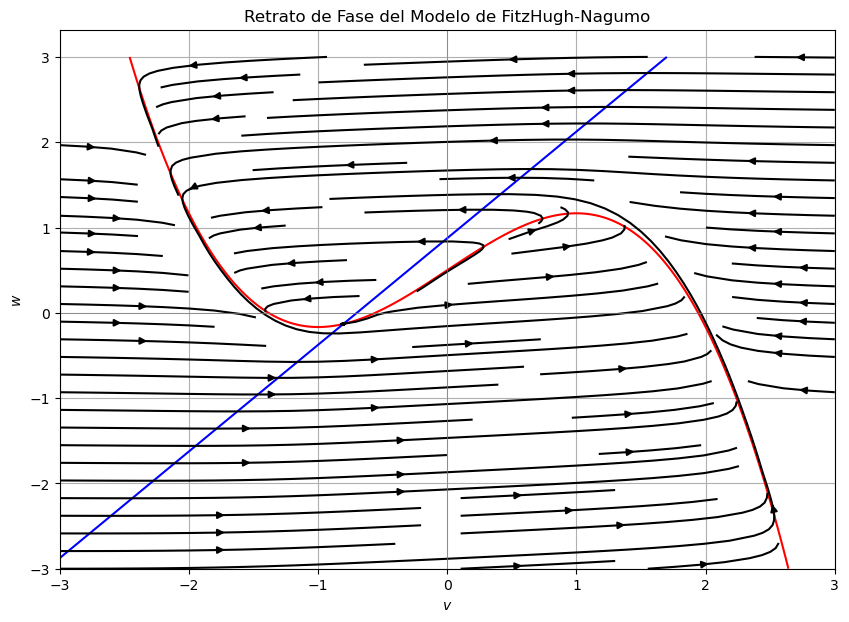

In [7]:
# Parámetros del modelo
a = 0.7
b = 0.8
tau = 12.5
I = 0.5
t_max = 100
dt = 0.01

# Funciones del sistema
def dv_dt(v, w, I):
    return v - (v**3) / 3 - w + I

def dw_dt(v, w, a, b, tau):
    return (v + a - b * w) / tau

# Generar una cuadrícula de puntos en el espacio de fases
v = np.linspace(-3, 3, 400)
w = np.linspace(-3, 3, 400)
V, W = np.meshgrid(v, w)

# Calcular las nullclines
dv = dv_dt(V, W, I)
dw = dw_dt(V, W, a, b, tau)

# Crear el retrato de fase
plt.figure(figsize=(10, 7))

# Nullcline de v
plt.contour(V, W, dv, levels=[0], colors='r')
# Nullcline de w
plt.contour(V, W, dw, levels=[0], colors='b')

# Campos vectoriales
dv = dv_dt(V, W, I)
dw = dw_dt(V, W, a, b, tau)
plt.streamplot(V, W, dv, dw, color='k')

# Configuración del gráfico
plt.xlabel('$v$')
plt.ylabel('$w$')
plt.title('Retrato de Fase del Modelo de FitzHugh-Nagumo')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid()
plt.show()


__Conclusión__

El modelo de FitzHugh-Nagumo es un sistema de ecuaciones diferenciales que describe la dinámica de osciladores bioquímicos. A través de este modelo, se pueden estudiar fenómenos de excitabilidad y oscilaciones observados en una variedad de sistemas biológicos, como neuronas y células cardiacas.

Una conclusión importante es que el modelo de FitzHugh-Nagumo es capaz de capturar comportamientos complejos y no lineales que son característicos de muchos sistemas biológicos. Algunas de las características clave que se pueden observar en este modelo incluyen:

1. Excitabilidad: El modelo puede representar la capacidad de ciertos sistemas biológicos para responder a estímulos y generar señales de salida, como los potenciales de acción en las neuronas.

2. Oscilaciones: Se pueden observar oscilaciones auto-sostenidas en el modelo, lo que refleja la capacidad de algunos sistemas biológicos para generar patrones de actividad periódicos, como los ritmos cardíacos o las oscilaciones de calcio en las células.

3. Estabilidad: El modelo puede tener puntos críticos estables o inestables, lo que proporciona información sobre la estabilidad del sistema en diferentes condiciones y su capacidad para regresar a un estado de equilibrio después de una perturbación.

En resumen, el modelo de FitzHugh-Nagumo es una herramienta valiosa para estudiar y comprender los fenómenos de excitabilidad y oscilaciones en sistemas biológicos. Su capacidad para capturar comportamientos complejos lo convierte en un marco útil para investigar una amplia gama de procesos biológicos y fisiológicos.